In [10]:
import tensorflow as tf
import numpy as np
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing import image


In [13]:
InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in InceptionV3_model.layers[:-15]:
    layer.trainable = False
x=InceptionV3_model.output
x=GlobalAveragePooling2D()(x)
x=Flatten()(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.3)(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.3)(x)
output=Dense(units=4,activation='softmax')(x)
model=Model(InceptionV3_model.input,output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_188 (Conv2D)         (None, 111, 111, 32)         864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_188 (B  (None, 111, 111, 32)         96        ['conv2d_188[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_188 (Activation  (None, 111, 111, 32)         0         ['batch_normalization_188[

In [38]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics='accuracy')

In [40]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(r'C:\Users\bhuva\Downloads\chest_ct_scan\Data\train',target_size = (224, 224),batch_size = 32,class_mode = 'categorical')
test_set = train_datagen.flow_from_directory(r'C:\Users\bhuva\Downloads\chest_ct_scan\Data\test',target_size = (224, 224),batch_size = 32,class_mode = 'categorical')
model1 = model.fit_generator(training_set,validation_data=test_set,epochs=12,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


C:\Users\bhuva\AppData\Local\Temp\ipykernel_9920\643561818.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model1 = model.fit_generator(training_set,validation_data=test_set,epochs=12,steps_per_epoch=len(training_set),validation_steps=len(test_set))


Epoch 1/12
20/20 [==============================] - 77s 4s/step - loss: 0.6695 - accuracy: 0.7210 - val_loss: 0.7562 - val_accuracy: 0.6571
Epoch 2/12
20/20 [==============================] - 76s 4s/step - loss: 0.6562 - accuracy: 0.7341 - val_loss: 0.7024 - val_accuracy: 0.6984
Epoch 3/12
20/20 [==============================] - 76s 4s/step - loss: 0.6026 - accuracy: 0.7537 - val_loss: 0.6952 - val_accuracy: 0.6889
Epoch 4/12
20/20 [==============================] - 77s 4s/step - loss: 0.6190 - accuracy: 0.7569 - val_loss: 0.7087 - val_accuracy: 0.6952
Epoch 5/12
20/20 [==============================] - 72s 4s/step - loss: 0.6089 - accuracy: 0.7471 - val_loss: 0.6904 - val_accuracy: 0.6984
Epoch 6/12
20/20 [==============================] - 72s 4s/step - loss: 0.5909 - accuracy: 0.7667 - val_loss: 0.7076 - val_accuracy: 0.7270
Epoch 7/12
20/20 [==============================] - 72s 4s/step - loss: 0.5448 - accuracy: 0.7732 - val_loss: 0.6601 - val_accuracy: 0.7302
Epoch 8/12
20/20 [==

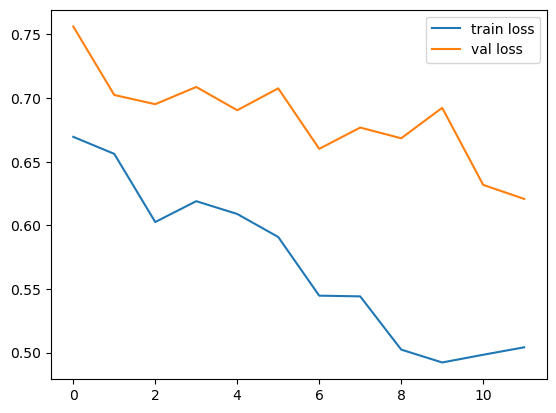

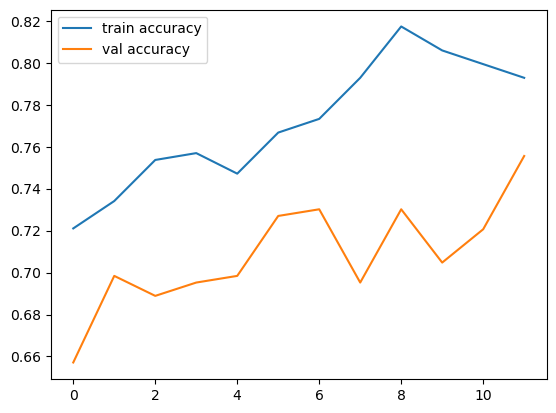

<Figure size 640x480 with 0 Axes>

In [42]:
plt.plot(model1.history['loss'], label='train loss')
plt.plot(model1.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
plt.plot(model1.history['accuracy'], label='train accuracy')
plt.plot(model1.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')